This notebook is for analysis on the final tweets/games dataset containing tweets referencing the mavs and their sentiment, and any game that was played on the same day. If there was not a game played on that day, the `following_result` column indicates the result of the next game that was played.

In [81]:
import pandas as pd
import datetime as datetime
import nltk
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import math
import seaborn as sns

In [21]:
tw_df = pd.read_csv('Datasets\\tweets_games_final.csv')
tw_df.head()

,Unnamed: 0,Datetime,tweet_id,username,text,verified,retweet_count,like_count,Date,Opposing Team,Win or Loss,Score,Record,Leading Scorer-Winner,Leading Scorer Points,Leading Scorer Loss,Leading Scorer Points.1,tweet_sentiment,following_result
0,0,2021-10-20 00:00:47+00:00,1450612926893760517,mabinanba,da um mata leão nele e tranca armário,False,0,1,2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,L
1,1,2021-10-20 00:00:54+00:00,1450612957193261056,Aaron_Del24,Jazz Suns Lakers Mavs Blazers Nuggets Warriors...,False,0,0,2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,L
2,2,2021-10-20 00:01:02+00:00,1450612991649632262,ZachPrell,"I sure hope , want see Luka Mavs good things",False,0,1,2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8126,L
3,3,2021-10-20 00:01:13+00:00,1450613037568872454,MensaNinja,U mean like Redick Meli ...... I 'm surprised ...,False,0,0,2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6096,L
4,4,2021-10-20 00:02:19+00:00,1450613312778031108,ChrisGallegosNV,"I ’ saying throw , ’ clear ’ substantive conve...",False,0,0,2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9476,L


Performing exploratory data analysis on the dataset.

In [23]:
#Finding the average sentiment of verified users vs non-verified users

#Dropping tweets that are completely neutral
senti_df = tw_df[tw_df.tweet_sentiment != 0]

verified_df = senti_df.loc[senti_df['verified'] == True]
verified_pol_mean = verified_df['tweet_sentiment'].mean()

nonv_df = senti_df.loc[senti_df['verified'] == False]
nonv_pol_mean = nonv_df['tweet_sentiment'].mean()

print('Verified polarity mean: ' + str(verified_pol_mean))
print('Verified samples: ' + str(verified_df.size))
print('Nonverified polarity mean: ' + str(nonv_pol_mean))
print('Nonverified samplesL ' + str(nonv_df.size))

Verified polarity mean: 0.2752564087418782
Verified samples: 96501
Nonverified polarity mean: 0.21353884312649035
Nonverified samplesL 1868346


So here we can see that the polarity of the tweets from verified users is slightly higher than that of non-verified users. However, the number of tweets from non-verified users is much higher as well. Another potential bias within the data is that the majority of tweets seem to have positive sentiment. This is likely a result of response and selection bias within the query in data collection: fans of a particular team are more likely to tweet about them than people that are neutral or dislike them.

Verified sentiment preceding a win: 0.24343606796116524
Nonverified sentiment preceding a win: 0.20265060290155731
Verified sentiment preceding a loss: 0.2687075504828804
Nonverified sentiment preceding a loss: 0.18604758566295404


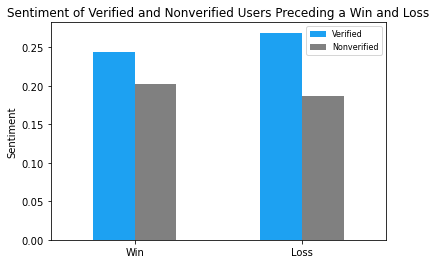

In [77]:
#Performing further analysis on the sentiment of tweets before games: dropping tweets that were made the same day as a game.
senti_df = senti_df.replace({np.nan: None})

pregame_df = senti_df[senti_df['Record'].isna()]

#Comparing the sentiment of nonverified users to verified users when the following game result is a W/L
win_df = pregame_df[pregame_df['following_result'] == 'W']

veri_win = win_df[win_df['verified'] == True]['tweet_sentiment'].mean()
nonveri_win = win_df[win_df['verified'] == False]['tweet_sentiment'].mean()
print('Verified sentiment preceding a win: ' + str(veri_win))
print('Nonverified sentiment preceding a win: ' + str(nonveri_win))

loss_df = pregame_df[pregame_df['following_result'] == 'L']
veri_loss = loss_df[loss_df['verified'] == True]['tweet_sentiment'].mean()
nonveri_loss = loss_df[loss_df['verified'] == False]['tweet_sentiment'].mean()
print('Verified sentiment preceding a loss: ' + str(veri_loss))
print('Nonverified sentiment preceding a loss: ' + str(nonveri_loss))

#Visualizing
veri_results = [veri_win, veri_loss]
nonveri_results = [nonveri_win, nonveri_loss]
wl_df= pd.DataFrame({'Verified': veri_results, 'Nonverified': nonveri_results}, index=['Win', 'Loss'])

ax = wl_df.plot.bar(rot=0, color={'Verified': '#1DA1F2', 'Nonverified':'gray'})
plt.ylabel('Sentiment')
plt.legend(loc=1, prop={'size': 8})
plt.title('Sentiment of Verified and Nonverified Users Preceding a Win and Loss')
plt.show()


This seeks to address the main research question from the hypothesis. It can be seen that verified users typically tend to be more positive than nonverified users regardless of a win or loss. However, preceding a loss, verified users are even more positive than nonverified users compared to when their tweet precedes a win. This is interesting since despite the team losing after the tweet was made, verified users seem to be comparatively more optimistic than before a win. When considering the wisdom of the crowd, perhaps the nonverified user's relative pessimism towards the team indicates higher accuracy. However, verified users are indeed consistently more positive, meaning that before a win, they are rightfully more positive than nonverified users.

<AxesSubplot:>

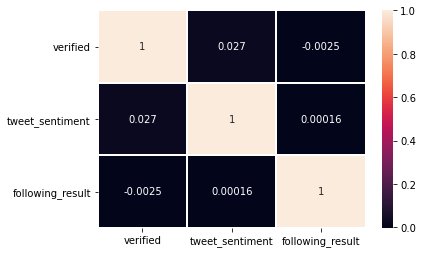

In [96]:
#Performing Correlation Analysis
corr_df = senti_df[['verified', 'tweet_sentiment', 'following_result']]
#Changing W to 1 and L to 0
corr_df = corr_df.replace({'following_result':{'W': 1, 'L': 0}})
sns.heatmap(corr_df.corr(method ='pearson'), annot=True,lw=1)

While there is indeed a slight difference between how verified and nonverified users perform, there appears to be practically no correlation between the sentiment of tweets and the following result of games. Further analysis may include performing this correlation analysis on the particular verified/nonverified datasets.